## Dataset information (GSM3438655)

**Wang, Y. T., Zaitsev, K., Lu, Q., Li, S., Schaiff, W. T., Kim, K. W., Droit, L., Wilen, C. B., Desai, C., Balce, D. R., Orchard, R. C., Orvedahl, A., Park, S., Kreamalmeyer, D., Handley, S. A., Pfeifer, J. D., Baldridge, M. T., Artyomov, M. N., Stallings, C. L., & Virgin, H. W. (2020). Select autophagy genes maintain quiescence of tissue-resident macrophages and increase susceptibility to Listeria monocytogenes. Nature microbiology, 5(2), 272–281. https://doi.org/10.1038/s41564-019-0633-0**

**Extraction protocol:** Total peritoneal cells from Becn1f/f-LysMcre mice were harvested. Utilizing the v2 Chromium™ Single Cell 3’ Library Kit and Chromium instrument (10x Genomics), poly-adenylated mRNA from an individual cell is tagged with a unique 16bp 10x barcode and 10bp Unique Molecular Identifier.

**Library strategy:** RNA-Seq Library source: transcriptomic Library selection: cDNA Instrument model: Illumina HiSeq 4000

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3438655

## Import ScanPy and Required libraries

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.io import mmread
import anndata as ad
import pandas as pd

## Loading data

In [ ]:
barcodes = pd.read_csv('/content/GSM3438655_Beclin_lysM_barcodes.tsv.gz', 
                       header = None, names = ['cells'])
genes = pd.read_csv('/content/GSM3438655_Beclin_lysM_features.tsv.gz', delimiter = '\t', 
                       header = None, names = ['gene_name', 'gene_symbol'])
matrix = mmread('/content/GSM3438655_Beclin_lysM_matrix.mtx.gz').tocsr()
adata = ad.AnnData(matrix.T, var=genes, obs=barcodes)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  
/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## Original dataset

In [ ]:
adata

AnnData object with n_obs × n_vars = 8013 × 27998
    obs: 'cells'
    var: 'gene_name', 'gene_symbol'

In [ ]:
adata.var_names=adata.var.gene_symbol

In [ ]:
adata.var_names_make_unique() 

## Basic filtering

In [ ]:
sc.pp.filter_cells(adata, min_genes=20)
sc.pp.filter_genes(adata, min_cells=20)
adata

AnnData object with n_obs × n_vars = 8013 × 12672
    obs: 'cells', 'n_genes'
    var: 'gene_name', 'gene_symbol', 'n_cells'

**15326 of 27998 genes were filtered out**

## Genes

In [ ]:
adata.var

,gene_name,gene_symbol,n_cells
gene_symbol,,,
Rp1,ENSMUSG00000025900,Rp1,242
Mrpl15,ENSMUSG00000033845,Mrpl15,2724
Lypla1,ENSMUSG00000025903,Lypla1,2458
Tcea1,ENSMUSG00000033813,Tcea1,3785
Atp6v1h,ENSMUSG00000033793,Atp6v1h,1719
...,...,...,...
AC168977.2,ENSMUSG00000094915,AC168977.2,57
AC168977.1,ENSMUSG00000079808,AC168977.1,531
PISD,ENSMUSG00000095041,PISD,5030


In [ ]:
adata.var_names

Index(['Rp1', 'Mrpl15', 'Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1',
       '4732440D04Rik', 'Pcmtd1', 'Gm26901', 'Rrs1',
       ...
       'AC133103.1', 'AC132444.1', 'Csprs', 'AC125149.3', 'AC125149.2',
       'AC168977.2', 'AC168977.1', 'PISD', 'DHRSX', 'CAAA01147332.1'],
      dtype='object', name='gene_symbol', length=12672)

In [ ]:
adata.obs.head(10)

,cells,n_genes
0,AAACCTGAGACCTAGG-1,2619
1,AAACCTGAGCCTCGTG-1,958
2,AAACCTGAGCGGCTTC-1,793
3,AAACCTGAGGATCGCA-1,2574
4,AAACCTGAGTACTTGC-1,3338
5,AAACCTGCAACTTGAC-1,2383
6,AAACCTGCAAGTCTAC-1,1330
7,AAACCTGGTAAGTGGC-1,3652
8,AAACCTGGTACGAAAT-1,2687
9,AAACCTGGTCATGCCG-1,1375


## Observations

In [ ]:
adata.uns

OverloadedDict, wrapping:
	OrderedDict()
With overloaded keys:
	['neighbors'].

## Matrix and Top expressed genes

In [ ]:
adata.X

<8013x12672 sparse matrix of type '<class 'numpy.float32'>'
	with 18634437 stored elements in Compressed Sparse Column format>

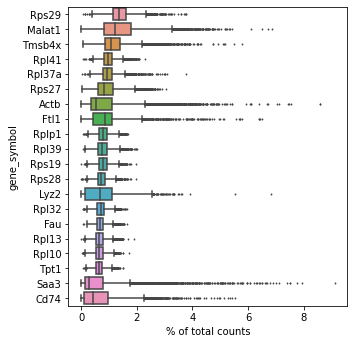

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20, )

## Visualization and filteration of poor-quality cells

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-' or 'mt-')  # annotate the group of mitochondrial genes as 'mt'
adata.var

,gene_name,gene_symbol,n_cells,mt
gene_symbol,,,,
Rp1,ENSMUSG00000025900,Rp1,242,False
Mrpl15,ENSMUSG00000033845,Mrpl15,2724,False
Lypla1,ENSMUSG00000025903,Lypla1,2458,False
Tcea1,ENSMUSG00000033813,Tcea1,3785,False
Atp6v1h,ENSMUSG00000033793,Atp6v1h,1719,False
...,...,...,...,...
AC168977.2,ENSMUSG00000094915,AC168977.2,57,False
AC168977.1,ENSMUSG00000079808,AC168977.1,531,False
PISD,ENSMUSG00000095041,PISD,5030,False


In [ ]:
adata.var['mt'].value_counts()

False    12672
Name: mt, dtype: int64

In [ ]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=True, inplace=True)

In [ ]:
adata.obs

,cells,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
0,AAACCTGAGACCTAGG-1,2619,2619,7.870930,11491.0,9.349406,0.0,0.0,0.0
1,AAACCTGAGCCTCGTG-1,958,958,6.865891,2778.0,7.929846,0.0,0.0,0.0
2,AAACCTGAGCGGCTTC-1,793,793,6.677083,2780.0,7.930566,0.0,0.0,0.0
3,AAACCTGAGGATCGCA-1,2574,2574,7.853605,10939.0,9.300181,0.0,0.0,0.0
4,AAACCTGAGTACTTGC-1,3338,3338,8.113427,15772.0,9.666055,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8008,TTTGTCATCCGTCAAA-1,1783,1783,7.486613,7027.0,8.857657,0.0,0.0,0.0
8009,TTTGTCATCGTACGGC-1,2831,2831,7.948738,13409.0,9.503756,0.0,0.0,0.0
8010,TTTGTCATCTACTTAC-1,1728,1728,7.455298,6217.0,8.735204,0.0,0.0,0.0
8011,TTTGTCATCTATCGCC-1,1816,1816,7.504942,6025.0,8.703838,0.0,0.0,0.0


In [ ]:
adata.var

,gene_name,gene_symbol,n_cells,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
gene_symbol,,,,,,,,,,
Rp1,ENSMUSG00000025900,Rp1,242,False,242,0.032447,0.031932,96.979908,260.0,5.564520
Mrpl15,ENSMUSG00000033845,Mrpl15,2724,False,2724,0.451766,0.372781,66.005241,3620.0,8.194506
Lypla1,ENSMUSG00000025903,Lypla1,2458,False,2458,0.393486,0.331808,69.324847,3153.0,8.056427
Tcea1,ENSMUSG00000033813,Tcea1,3785,False,3785,0.716586,0.540337,52.764258,5742.0,8.655737
Atp6v1h,ENSMUSG00000033793,Atp6v1h,1719,False,1719,0.251716,0.224515,78.547361,2017.0,7.609862
...,...,...,...,...,...,...,...,...,...,...
AC168977.2,ENSMUSG00000094915,AC168977.2,57,False,57,0.007488,0.007460,99.288656,60.0,4.110874
AC168977.1,ENSMUSG00000079808,AC168977.1,531,False,531,0.128541,0.120926,93.373268,1030.0,6.938284
PISD,ENSMUSG00000095041,PISD,5030,False,5030,1.325596,0.843976,37.227006,10622.0,9.270777


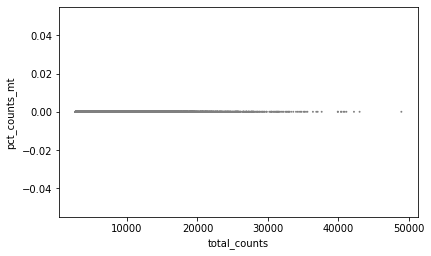

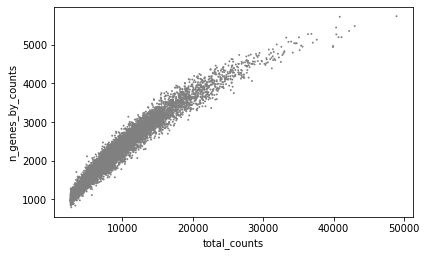

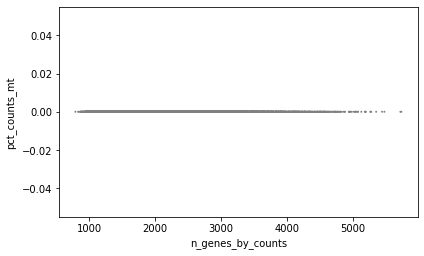

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata, x='n_genes_by_counts', y='pct_counts_mt')

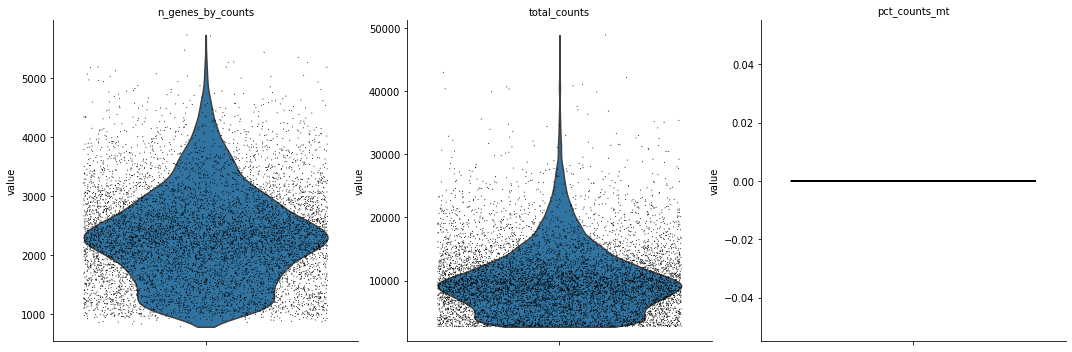

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [ ]:
adata = adata[adata.obs.n_genes_by_counts > 1000, :].copy()
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

adata

AnnData object with n_obs × n_vars = 7896 × 12672
    obs: 'cells', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'gene_symbol', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

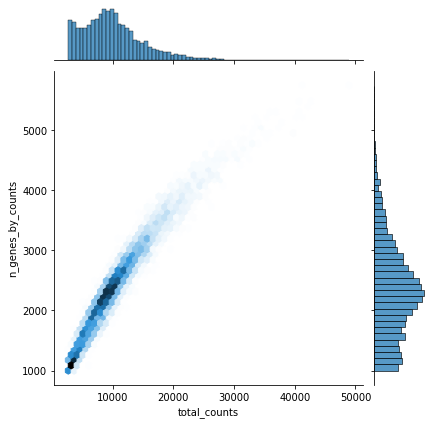

In [ ]:
import seaborn as sns

sns.jointplot(
    data=adata.obs,
    x="total_counts",
    y="n_genes_by_counts",
    kind="hex",
)

## Normalization and scaling the data

In [ ]:
pd.DataFrame.sparse.from_spmatrix(adata.X[:100, :100])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,...,0.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,3.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,2.0,...,0.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,52.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,22.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
97,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,46.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
98,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4) # Total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell, so that counts become comparable among cells.
sc.pp.log1p(adata) # log-normalization

In [ ]:
pd.DataFrame.sparse.from_spmatrix(adata.X[:100, :100])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.626070,0.000000,0.000000,0.0,0.626070,0.0,0.000000,...,0.000000,3.625683,0.0,0.626070,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.649279,0.000000,0.000000,0.000000,1.319749,0.0,0.000000,0.0,0.649279,...,0.000000,3.209559,0.0,0.000000,0.000000,0.649279,0.0,0.0,0.0,0.0
2,0.000000,1.065436,0.491052,0.818929,0.491052,0.491052,0.0,0.491052,0.0,0.818929,...,0.000000,3.027961,0.0,0.000000,0.491052,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.592953,0.000000,0.000000,0.000000,0.592953,0.0,0.592953,0.0,0.000000,...,0.000000,3.685060,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,1.240227,0.000000,0.000000,1.240227,0.0,0.000000,0.0,0.000000,...,0.000000,3.494481,0.0,1.240227,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.492187,0.000000,0.820563,0.000000,0.492187,0.0,0.000000,0.0,0.492187,...,0.000000,3.528307,0.0,0.000000,0.000000,0.820563,0.0,0.0,0.0,0.0
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,3.169698,0.0,0.711172,1.122574,0.000000,0.0,0.0,0.0,0.0
97,0.000000,0.504715,0.000000,0.504715,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.504715,3.440405,0.0,0.000000,0.504715,0.504715,0.0,0.0,0.0,0.0
98,0.000000,0.863942,1.320419,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,2.936112,0.0,0.000000,0.000000,0.863942,0.0,0.0,0.0,0.0


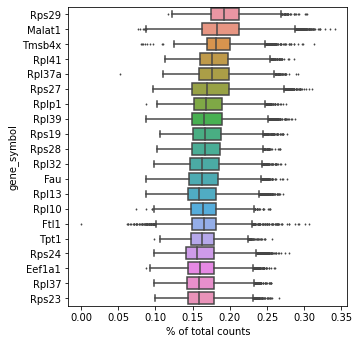

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20, )

## Identification of highly variable features

**R-version**

![alt text](https://drive.google.com/uc?export=view&id=1j-dsTJWAuUDNmgacNPJUTFs22cq2MuL8) 

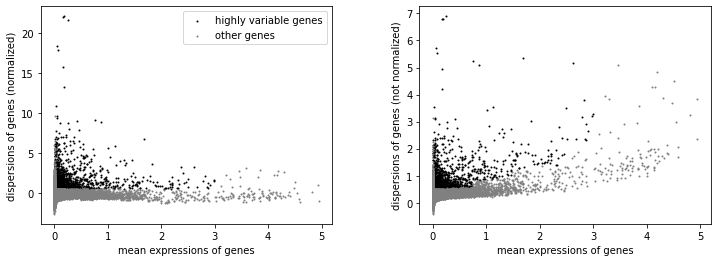

In [ ]:
import matplotlib.pyplot as plt
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
gca = sc.pl.highly_variable_genes(adata, show=False, log=False) 

In [ ]:
adata.var['highly_variable'].value_counts()

False    11285
True      1387
Name: highly_variable, dtype: int64

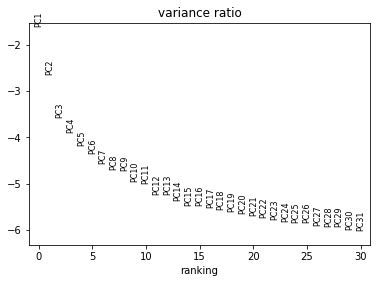

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

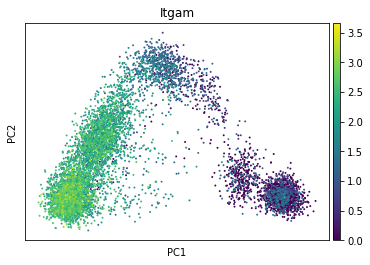

In [ ]:
sc.pl.pca(adata, color='Itgam')

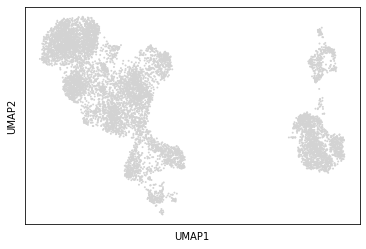

In [ ]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata)

##  Cell clusters

**From paper**

![alt text](https://drive.google.com/uc?export=view&id=1MIHzDKpzmrE0KbMuO6vF9d1y0eNHeL9D) 

**R-version**
![alt text](https://drive.google.com/uc?export=view&id=1dqBttP8YBxzcWlDiQUUlxU4WIgWrp9tz) 

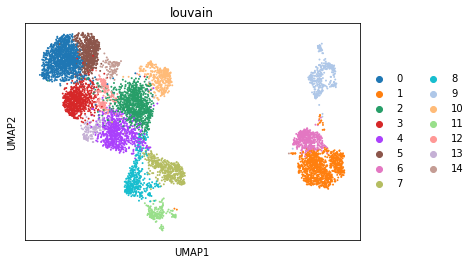

In [ ]:
sc.tl.louvain(adata, resolution=1.2)
sc.pl.umap(adata, color='louvain')

### Another way of vizualization

In [ ]:
sc.tl.leiden(adata, key_added='clusters', resolution=0.5)

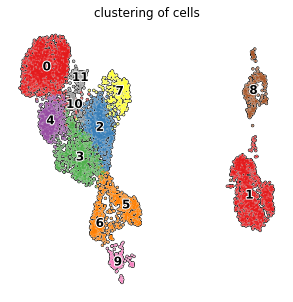

In [ ]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [ ]:
marker_genes_dict = {
    'Macrophages': ["Adgre1", "Ptprc", "Itgam","Cd68","Retnla","H2-Ab1"],
    'Proliferating_Macrophages': ["Mki67","Pcna"],
    'Monocytes': ["Ccr2"],
    'T-cells': ["Cd4","Cd3d"],
    'naive T-cells': ["Cd4","Cd3d"],
    'B-cells': ["Cd79a","Cd19"],
}

`dotplot`

Checking expression of genes per cluster with dotplot.

categories: 0, 1, 2, etc.
var_group_labels: Macrophages, Proliferating_Macrophages, Monocytes, etc.


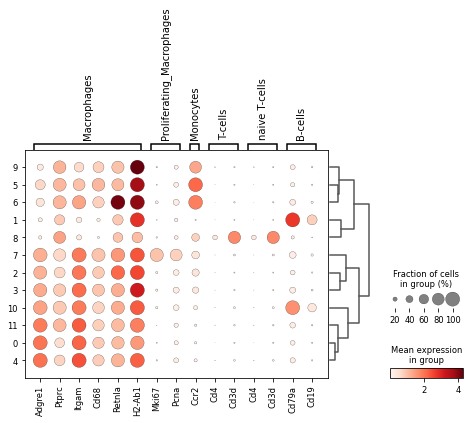

In [ ]:
sc.pl.dotplot(adata, marker_genes_dict, 'clusters', dendrogram=True)

`stacked-violin plot`

Violin plot to visualize marker genes.

categories: 0, 1, 2, etc.
var_group_labels: Macrophages, Proliferating_Macrophages, Monocytes, etc.


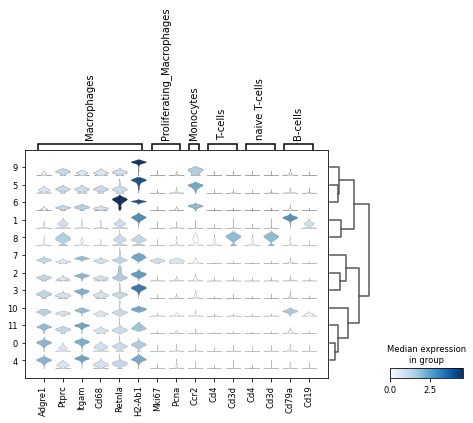

In [ ]:
ax = sc.pl.stacked_violin(adata, marker_genes_dict, groupby='clusters', swap_axes=False, dendrogram=True)

## Main populations

|Populations|	Markers|
|-----------|:-------|
|Macrophages|	ADGRE1, PTPRC, ITGAM, CD68, Retnla|
|Proliferating Macrophages|	Mki67,PCNA|
|Monocytes|	CCR2
|T-cells|	CD4,CD3d
|naive T-cells|	CD62l, CD44,Ccr7
|B-cells|	CD79a, CD19

**From paper**

![alt text](https://drive.google.com/uc?export=view&id=12V3dz2rak0s0mgr_NOikUCgI_HSD_5xQ) 



## Visualizing gene expression in clusters

### Macrophages

**R-version**
![alt text](https://drive.google.com/uc?export=view&id=1Tre3FYj518iYOKy0JGZHJtejP6hmabtZ) 


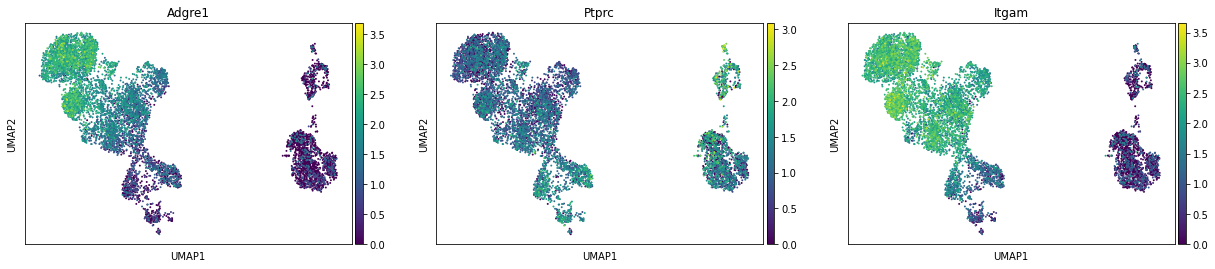

In [ ]:
sc.pl.umap(adata, color=["Adgre1", "Ptprc", "Itgam"])

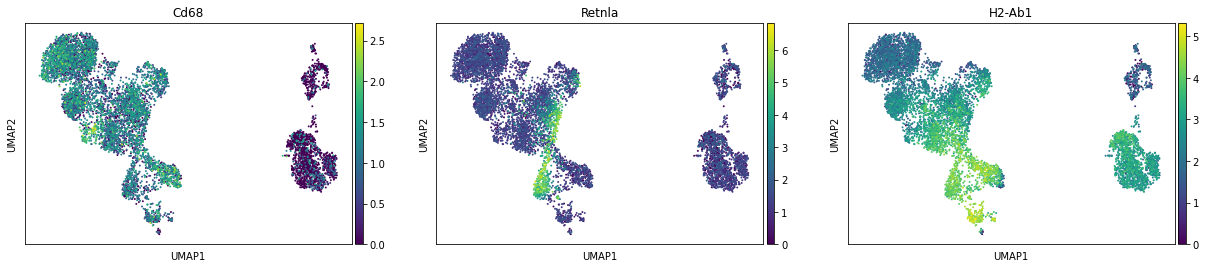

In [ ]:
sc.pl.umap(adata, color=["Cd68","Retnla","H2-Ab1"])

**High expression of H2-Ab1(MHCII)**

### Proliferating Macrophages

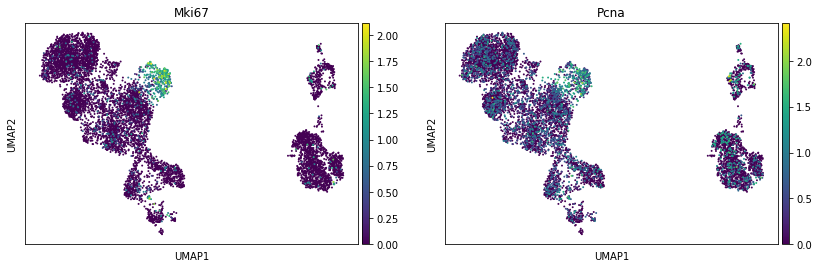

In [ ]:
sc.pl.umap(adata, color=["Mki67","Pcna"])

### Moncytes

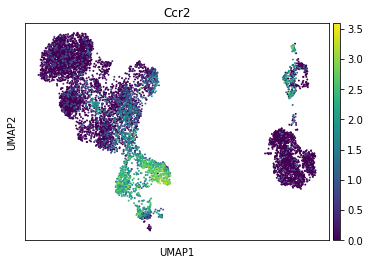

In [ ]:
sc.pl.umap(adata, color=["Ccr2"])

### T-cells

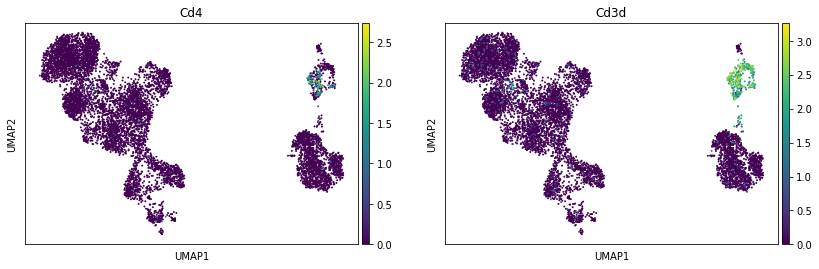

In [ ]:
sc.pl.umap(adata, color=["Cd4","Cd3d"])

### Naive T-cells

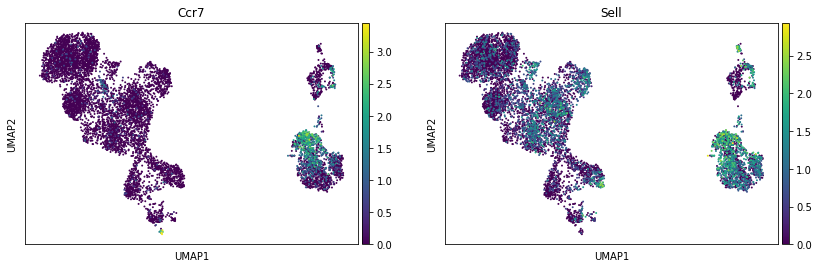

In [ ]:
sc.pl.umap(adata, color=["Ccr7","Sell"])

**Naive T-cells are almost absent**

### B-cells

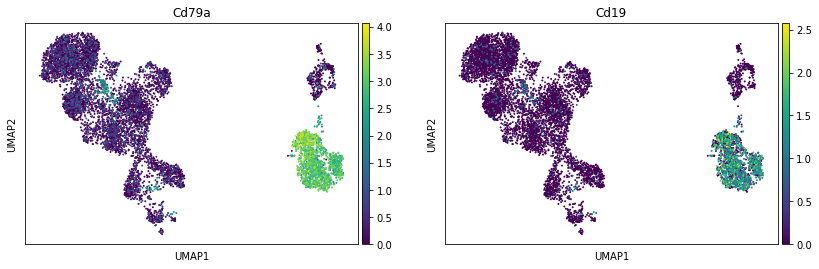

In [ ]:
sc.pl.umap(adata, color=["Cd79a","Cd19"])

**In the paper authors identified several main populations: macrophages (8 clasters), proliferating macrophages (1 claster), monocytes (3 clasters), B-cells (4 clasters), T-cells and NK cells (3 clasters together). Also in the WT mice two clasters of tissue-resident macrophages were found, which were almost absent in Becn1f/f-LysMcre mice**

### Gene Expression of tissue-specific genes in the macrophages (from the paper)

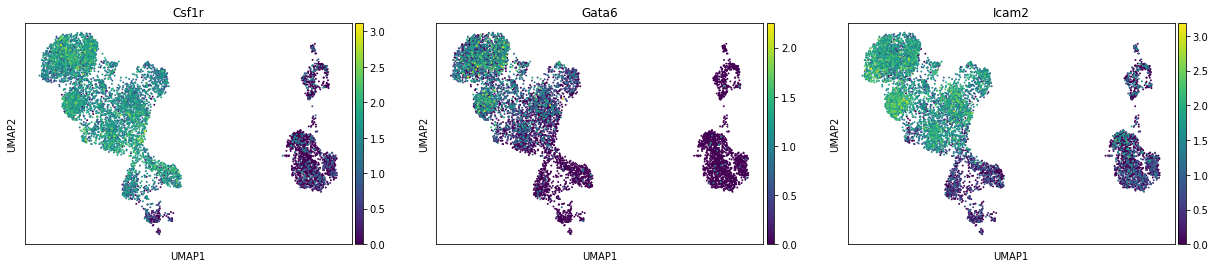

In [ ]:
sc.pl.umap(adata, color=["Csf1r","Gata6", "Icam2"])

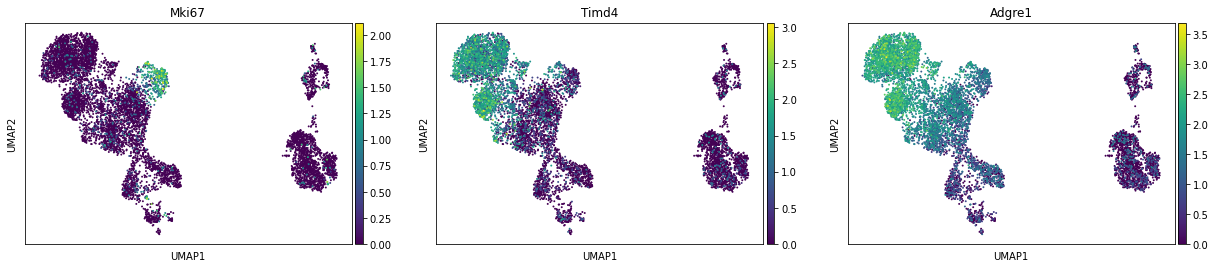

In [ ]:
sc.pl.umap(adata, color=["Mki67", "Timd4","Adgre1"])

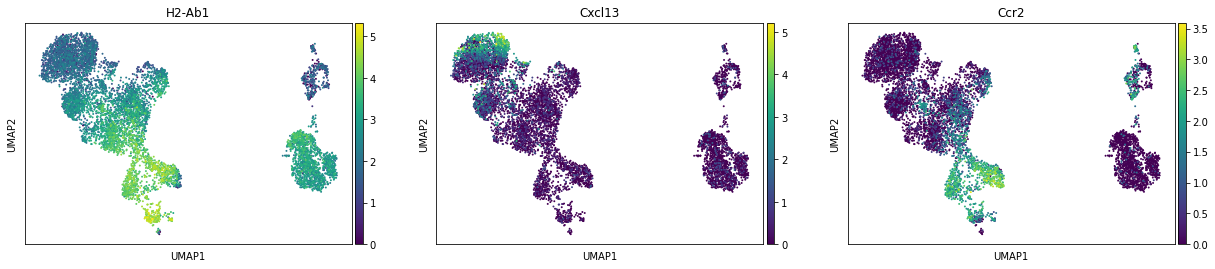

In [ ]:
sc.pl.umap(adata, color=["H2-Ab1","Cxcl13","Ccr2"])

## Running DGE tests to find cluster biomarkers

**R-version**
![alt text](https://drive.google.com/uc?export=view&id=16nrCsIjHWb8mGDwStC2-TW6nK9gDOwKX) 

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Pf4,Cd79b,Slpi,C4b,H2-Ab1,C4b,Cd79a,Lst1,Pltp,Ms4a4b,Stmn1,H2-Aa,Plac8,Fth1,S100a8


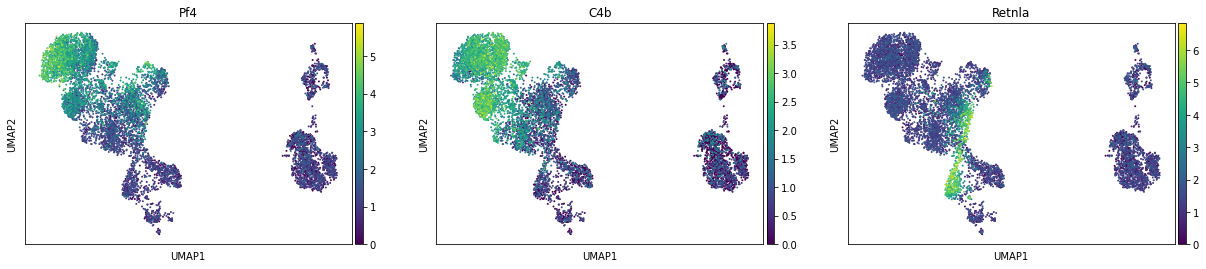

In [ ]:
sc.pl.umap(adata, color=["Pf4","C4b","Retnla"])

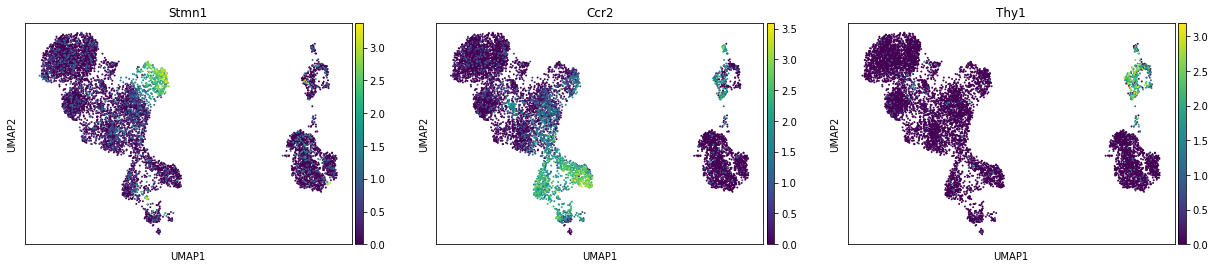

In [ ]:
sc.pl.umap(adata, color=["Stmn1","Ccr2","Thy1"])

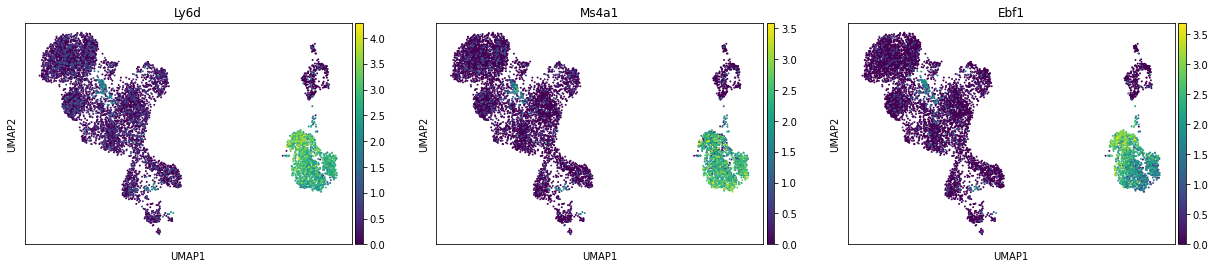

In [ ]:
sc.pl.umap(adata, color=["Ly6d","Ms4a1","Ebf1"])

* Myeloid clusters shows expression of Csf1r relative to the paper

* Similliry to the paper the reduced expression of genes Adgre1, Gata6, Timd4 can be seen in claster 1 simutaneously with the elevated level of Ccr2. This implied a monocyte origin of claster 1 cells.

## Another clustering and change size

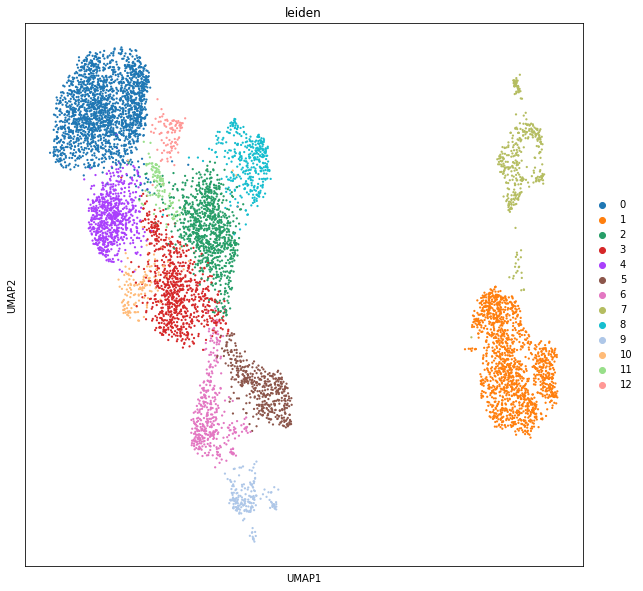

In [ ]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (10, 10)}):
    sc.tl.leiden(adata, resolution=0.7)
    sc.pl.umap(adata, color='leiden', s=20)

|Populations|	Markers|
|-----------|:-------|
|Macrophages|	PF4, C4b, Retnla
|Proliferating Macrophages|	STMN1
|Monocytes|	Ccr2
|T-cells|	Thy1
|B-cells|	Ly6d, Ms4a1, EBF1

## Trajectory inference

In [ ]:
import matplotlib.pyplot as pl
from matplotlib import rcParams

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

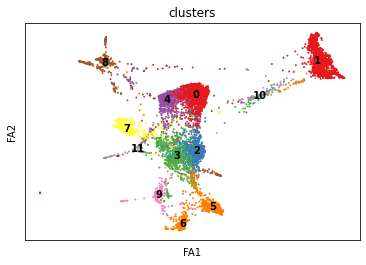

In [ ]:
sc.pl.draw_graph(adata, color='clusters', legend_loc='on data')

## Clustering and PAGA for cluster biomarkers

In [ ]:
sc.tl.louvain(adata, resolution=1.0)

In [ ]:
sc.tl.paga(adata, groups='louvain')

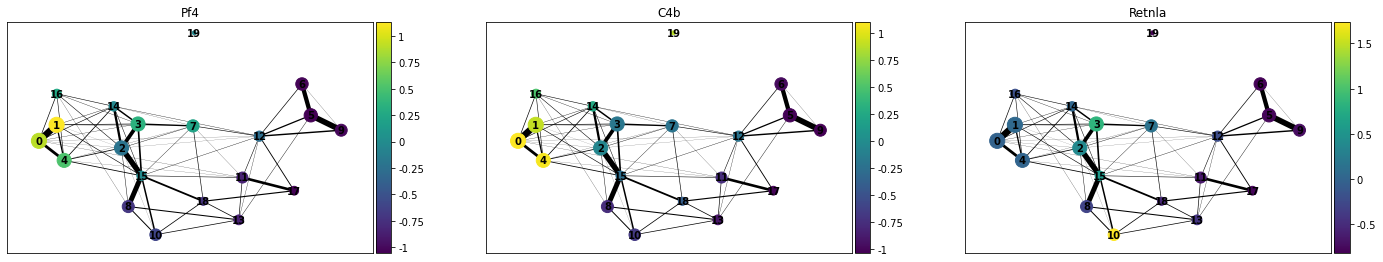

In [ ]:
sc.pl.paga(adata, color=["Pf4","C4b","Retnla"])

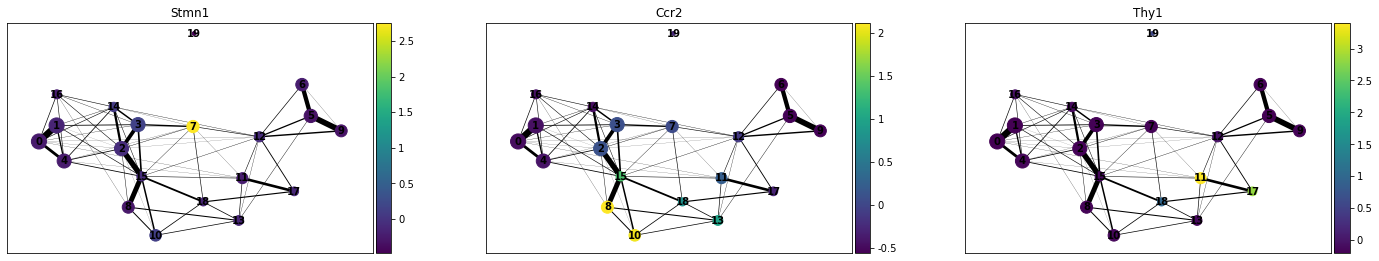

In [ ]:
sc.pl.paga(adata, color=["Stmn1","Ccr2","Thy1"])

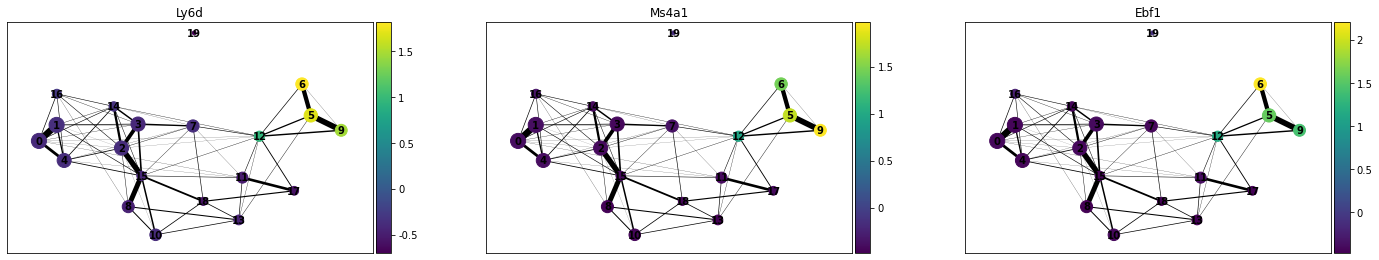

In [ ]:
sc.pl.paga(adata, color=["Ly6d","Ms4a1","Ebf1"])

## Conclusion

* Relative to the paper several populations were found in peritoneal cells from Becn1f/f-LysMcre mice: macrophages, proliferating macrophages, monocytes, B-cells, T-cells.

* Several markers for the populations were found using MAST test: PF4, C4b, Retnla, STMN1, Thy1, Ly6d, Ms4a1, EBF1.

* Similliry to the paper the reduced expression of genes Adgre1, Gata6, Timd4 can be seen in claster 1 simutaneously with the elevated level of Ccr2. This implied a monocyte origin of claster 1 cells.

* Naive T-cells are almost absent.
* High expression of H2-Ab1(MHCII) in macrophages.

